In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Common Function used for Questions 1,2 and 3

#Working:
    #First get the means and the covariances matrices for the 2 classes
    #Prepare a meshgrid
    #Check if the covariance matrices are equal if they are then apply the formula g(x)=(w^t)*x+w0
    #Else apply the formula g(x)=(x^t)*W*(x) + (w^t)*x + w0
    #Now plot the points and their means
    #Then use the contour function which uses the meshgrid and the values of the applied formula to give the decision boundary

def get_decision_bounday(c1,c2,priori1=1,priori2=1):
    mu1=c1.mean(axis=0)
    mu2=c2.mean(axis=0)
    
    cov1=np.cov(c1,rowvar=False)
    cov2=np.cov(c2,rowvar=False)

    x_min,x_max=min(c1.T[0].min(),c2.T[0].min())-1,max(c1.T[0].max(),c2.T[0].max())+1
    y_min,y_max=min(c1.T[1].min(),c2.T[1].min())-1,max(c1.T[1].max(),c2.T[1].max())+1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
    Z = np.zeros(xx.shape)
    if((cov1==cov2).all()):     #Check whether the covariance matrices are equal
        W=np.linalg.inv(cov1).dot(mu1-mu2)
        w0=(-0.5)*((mu1.T.dot(np.linalg.inv(cov1)).dot(mu1))-((mu2.T.dot(np.linalg.inv(cov1)).dot(mu2))))+np.log(priori1/priori2)
        Z=W[0]*xx+W[1]*yy+w0
    else:   
        for i in range(xx.shape[0]):
            for j in range(xx.shape[1]):
                x = np.array([xx[i, j], yy[i, j]])
                g1 = (-0.5 * x.T.dot(np.linalg.inv(cov1)).dot(x) + mu1.T.dot(np.linalg.inv(cov1)).dot(x) 
                      -0.5 * mu1.T.dot(np.linalg.inv(cov1)).dot(mu1) 
                      -0.5 * np.log(np.linalg.det(cov1)) + np.log(priori1))
                g2 = (-0.5 * x.T.dot(np.linalg.inv(cov2)).dot(x) + mu2.T.dot(np.linalg.inv(cov2)).dot(x) 
                      -0.5 * mu2.T.dot(np.linalg.inv(cov2)).dot(mu2) 
                      -0.5 * np.log(np.linalg.det(cov2)) + np.log(priori2))
                Z[i, j] = g1 - g2

    plt.scatter(c1[:,0],c1[:,1],label='class1',color='blue')
    plt.scatter(c2[:,0],c2[:,1],label='class2',color='orange')
    plt.scatter(mu1[0],mu1[1],label='mu1',color='blueviolet')
    plt.scatter(mu2[0],mu2[1],label='mu2',color='red')
    plt.plot([mu1[0],mu2[0]],[mu1[1],mu2[1]],color='pink',label='mean line')
    plt.contour(xx,yy,Z,levels=0)
    plt.legend()
    plt.show()

### Question 1

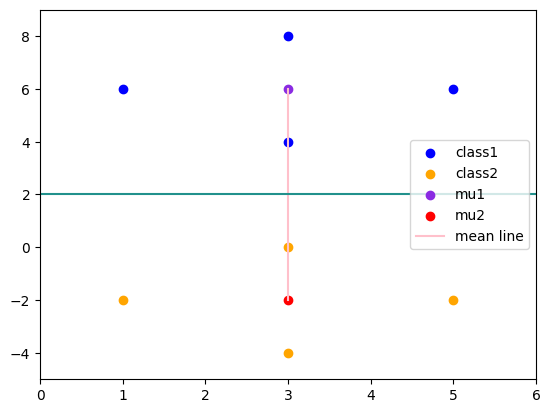

In [3]:
c1 = np.array([[1, 6], [3, 4], [3, 8], [5, 6]])
c2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])

get_decision_bounday(c1,c2)

### Question 2

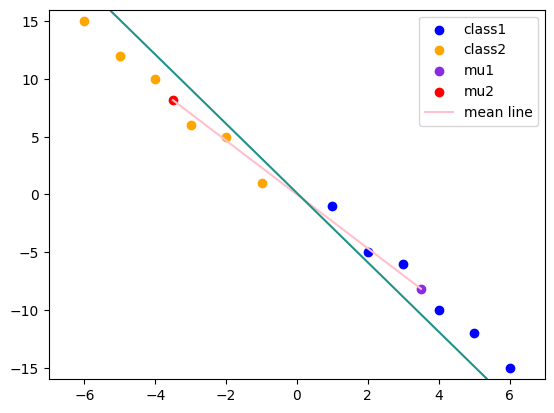

In [4]:
c1 = np.array([[1, -1], [2, -5], [3, -6], [4, -10], [5, -12], [6, -15]])
c2 = np.array([[-1, 1], [-2, 5], [-3, 6], [-4, 10], [-5, 12], [-6, 15]])

get_decision_bounday(c1,c2,0.3,0.7)

### Question 3

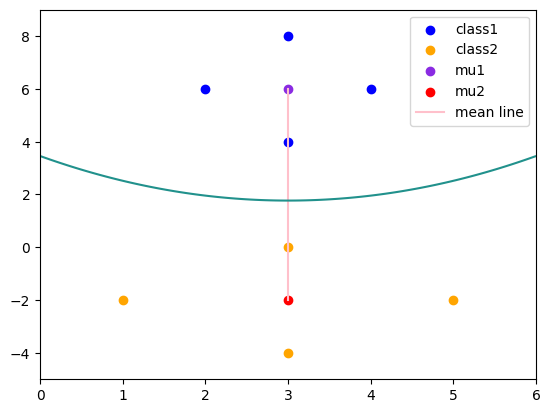

In [5]:
c1 = np.array([[2, 6], [3, 4], [3, 8], [4, 6]])
c2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])

get_decision_bounday(c1,c2)

### Question 4

In [6]:
#Working:
    #fit the training set i.e. find mean, variance etc. for each class
    #use the predict function to then look through the testing set and classify them based on the formula max( p = likelihood + prior ) where likelihood is the probability density function

class NaiveBayesClassifier2fNc: #2 features with n classes
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.variance = {}
        self.prior = {}
        
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.variance[c] = X_c.var(axis=0)
            self.prior[c] = X_c.shape[0] / X.shape[0]
    
    def pdf(self, X, c):
        mean = self.mean[c]
        var = self.variance[c]
        coeff = 1 / np.sqrt(2 * np.pi * var)
        exponent = np.exp(-((X - mean) ** 2) / (2 * var))
        return coeff * exponent

    def predict(self, X):
        predictions=[]
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.prior[c])
                likelihood = np.sum(np.log(self.pdf(x, c)))
                posteriors.append(prior + likelihood)
            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions)
    
    def accuracy(self,true_class,predicted_class):
        bool_table=(true_class==predicted_class)
        count=np.count_nonzero(bool_table==True)
        return count/len(bool_table)

#Working:
    #Create a meshgrid and for each pair of values in that grid predict the class of that point
    #Use the contour function using the meshgrid and the Z matrix to get the decision boundary
    #Plot the points in the training set
def plot_decision_boundary(fig,model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
    
    grid=[[x,y] for x,y in zip(np.ravel(xx),np.ravel(yy))]
    Z = model.predict(grid)

    unique_classes = sorted(set(y))
    class_mapping = {label: index for index, label in enumerate(unique_classes)}
    Z_numeric = np.vectorize(class_mapping.get)(Z)

    Z_numeric = Z_numeric.reshape(xx.shape)

    plt.contour(xx, yy, Z_numeric, alpha=0.3, cmap='winter', levels=len(unique_classes)-1)
    scatter_colors = {'Setosa': 'red', 'Virginica': 'blue', 'Versicolor': 'green'}
    plt.scatter(X[:, 0], X[:, 1], c=[scatter_colors[label] for label in y], marker='o')
    
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title('Naive Bayes Decision Boundary')

    return fig

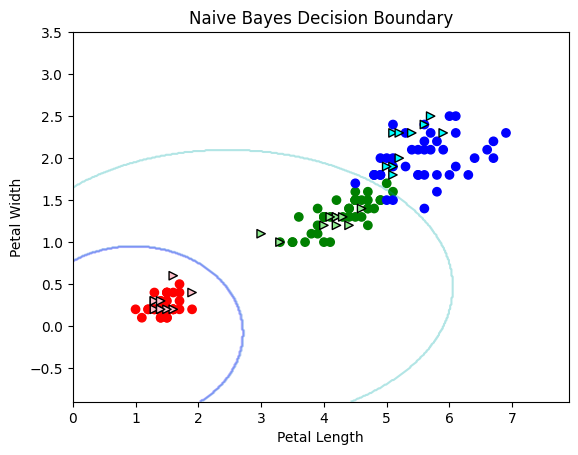

Accuracy: 100.0%


,True Class,Predictions
40,Setosa,Setosa
41,Setosa,Setosa
42,Setosa,Setosa
43,Setosa,Setosa
44,Setosa,Setosa
45,Setosa,Setosa
46,Setosa,Setosa
47,Setosa,Setosa
48,Setosa,Setosa
49,Setosa,Setosa


In [7]:
iris_df=pd.read_csv('./iris.csv')

iris_df.drop(['sepal.length','sepal.width'],axis=1,inplace=True)

training_df=iris_df.groupby(['variety']).head(40)
testing_df=iris_df.groupby(['variety']).tail(10)

training_X=training_df[['petal.length','petal.width']].values
training_y=training_df['variety'].values
model=NaiveBayesClassifier2fNc()
model.fit(training_X,training_y)

testing_X=testing_df[['petal.length','petal.width']].values
testing_y=testing_df['variety'].values
predicted_classes=model.predict(testing_X)

fig=plt.figure()
fig=plot_decision_boundary(fig,model, training_X,training_y)
testing_colors={'Setosa':'pink','Virginica':'cyan','Versicolor':'lightgreen'}
plt.scatter(testing_X[:,0],testing_X[:,1],c=[testing_colors[label] for label in predicted_classes],edgecolors='k',marker='>')
plt.show()

accuracy=model.accuracy(testing_y,predicted_classes)
print(f"Accuracy: {accuracy*100}%")
display(pd.DataFrame([[x,y] for x,y in zip(testing_y,predicted_classes)],columns=['True Class','Predictions'],index=testing_df.index))

### Question 5

In [8]:
#Working:
    #fit the training set i.e. find mean, variance etc. for each class
    #use the predict function to then look through the testing set and classify them based on the formula max( p = likelihood + prior ) where likelihood is the probability density function

class NaiveBayesClassifierNfNc: #n features with n classes
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.dimension=X.shape[1]
        self.mean = {}
        self.covariance = {}
        self.prior = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.covariance[c] = (np.cov(X_c.T))
            self.prior[c] = X_c.shape[0] / X.shape[0]
    
    def pdf(self, x, c):
        mean = self.mean[c]
        cov = self.covariance[c]
        determinant=np.linalg.det(cov)
        if(determinant==0):
            coeff=1
        else:
            coeff = 1 / np.sqrt(((2 * np.pi)**self.dimension) * determinant)
        exponent = np.exp(-0.5*(((x-mean).T).dot(np.linalg.inv(cov)).dot(x-mean)))
        return coeff * exponent

    def predict(self, X):
        predictions=[]
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.prior[c])
                likelihood = np.sum(np.log(self.pdf(x, c)))
                posteriors.append(prior + likelihood)
            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions)
    
    def accuracy(self,true_class,predicted_class):
        bool_table=(true_class==predicted_class)
        count=np.count_nonzero(bool_table==True)
        return count/len(bool_table)

In [12]:
face_feature_df=pd.read_csv('./face_feature_vectors.csv',index_col=0)

columns=['class']
columns.extend(face_feature_df.columns[1:])
face_feature_df.columns=columns

training_df=face_feature_df.groupby(['class']).head(395)
testing_df=face_feature_df.groupby(['class']).tail(5)

training_X=training_df.drop(['class'],axis=1)
training_y=training_df['class']

testing_X=testing_df.drop(['class'],axis=1).values
testing_y=testing_df['class'].values

model=NaiveBayesClassifierNfNc()
model.fit(training_X,training_y)

predicted_classes=model.predict(testing_X)

accuracy=model.accuracy(testing_y,predicted_classes)
print(f"Accuracy: {accuracy*100}%")
display(pd.DataFrame([[x,y] for x,y in zip(testing_y,predicted_classes)],columns=['True Class','Predictions'],index=testing_df.index))

Accuracy: 100.0%


,True Class,Predictions
396,male,male
397,male,male
398,male,male
399,male,male
400,male,male
796,female,female
797,female,female
798,female,female
799,female,female
800,female,female
